In [1]:
import pandas as pd
import json
from os import listdir
import seaborn as sns
sns.set()

In [38]:
files = [file for file in listdir() if 'GermanFairCurve_' in file]

results = []
for file in files:
    with open(file) as json_file:
        data = json.load(json_file)
    results.append({'accuracy' : data['mean_accuracy'],
                    'accuracy_std': data['std_accuracy'],
                'epsilon' :  file.split('_')[1].split('.txt')[0],
                'ip' : data['mean_ip']})

results = pd.DataFrame.from_records(results)

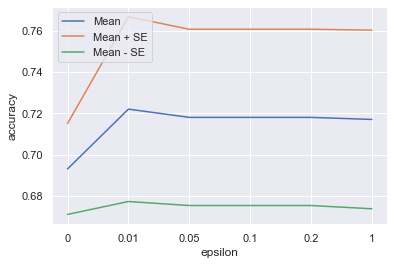

In [42]:
sns.lineplot(data=results, x='epsilon', y='accuracy', label = 'Mean')
sns.lineplot(data=results, x='epsilon', y=results['accuracy']+results['accuracy_std'], label='Mean + SE')
sns.lineplot(data=results, x='epsilon', y=results['accuracy']-results['accuracy_std'], label='Mean - SE')

Text(0, 0.5, 'Hamming Loss')

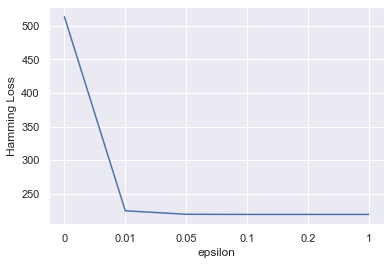

In [33]:
sns.lineplot(data=results, x='epsilon', y='ip')
sns.mpl.pyplot.ylabel('Hamming Loss')